Code for csv files 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the main directory containing the speckle images
image_dir = r'C:\Users\91897\Desktop\CP302\Speckle Images\C_3\Set3\Corner'

# Number of files
num_files = 90

# Initialize a list to store image data
A = []

# Load images and store them in the list
for i in range(1, num_files + 1):
    # Construct the file name
    file_name = f'T{i}_0008.ascii.csv'
    #file_name = f'T{i}.ascii.csv'
    file_path = os.path.join(image_dir, file_name)
    
    # Check if the file exists before trying to read it
    if os.path.isfile(file_path):
        try:
            # Use pandas to read the CSV file (handling missing/invalid data)
            data = pd.read_csv(file_path, header=None, delimiter=',', on_bad_lines='skip').fillna(0).to_numpy()
            # Store the data in the list
            A.append(data)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    else:
        print(f'File not found: {file_path}')

# Check if any valid data was loaded before stacking
if len(A) == 0:
    print("No valid data was loaded.")
else:
    # Convert the list into a 3D numpy array
    A = np.stack(A, axis=2)

    # Plot a particular frame (1st frame as an example)
    plt.figure()
    plt.imshow(A[:, :, 0], cmap='viridis')
    plt.colorbar()
    plt.title("First Frame")
    plt.show()

    # Define region of interest (ROI) and extract the sub-array
    B = A[400:1100, 600:1300, :]

    # Plot the first frame of the ROI
    plt.figure()
    plt.imshow(B[:, :, 0], cmap='viridis')
    plt.colorbar()
    plt.title("First Frame of ROI")
    plt.show()

    # Speckle contrast calculation
    S = np.zeros(num_files)
    mean_intensity = np.zeros(num_files)
    con = np.zeros(num_files)

    for k in range(num_files):
        # Calculate standard deviation manually
        S[k] = np.sqrt(np.mean((B[:, :, k] - np.mean(B[:, :, k]))**2))
        # Calculate mean intensity
        mean_intensity[k] = np.mean(B[:, :, k])
        # Speckle contrast = std. deviation / mean intensity
        con[k] = S[k] / mean_intensity[k]

    # Display speckle contrast values
    print('Speckle contrast values:')
    print(con)
    print('Mean speckle contrast:')
    print(np.mean(con))

    # Define the time array for plotting
    time = np.arange(0, num_files)

    # Plot the speckle contrast vs time
    plt.figure()
    plt.plot(time, con, linewidth=1.5, label='Speckle contrast')
    plt.xlabel('Time (min)', fontsize=12)
    plt.ylabel('Speckle Contrast', fontsize=12)
    plt.title('Speckle Contrast Over Time')
    plt.grid(True)
    plt.legend()

    # Save the plot as a PNG image
    plot_filename = 'Speckle_contrast.png'
    plt.savefig(plot_filename)
    plt.show()

    # Save the speckle contrast values to a CSV file
    csv_filename = 'Speckle_contrast_values.csv'
    df = pd.DataFrame({'Time (min)': time, 'Speckle Contrast': con})
    df.to_csv(csv_filename, index=False)

    print(f'Plot saved as {plot_filename}')
    print(f'Speckle contrast values saved in {csv_filename}')


Speckle contrast values:
[0.15807491 0.17349373 0.24693462 0.15959371 0.20479947 0.17760504
 0.20461528 0.20942359 0.20060391 0.18238445 0.18949383 0.20308751
 0.25855728 0.22574461 0.22443177 0.19444678 0.17864636 0.18146671
 0.16749429 0.15979999 0.3711627  0.20746667 0.18837644 0.15644663
 0.142929   0.14360176 0.17740588 0.19828339 0.18286771 0.17664082
 0.17303269 0.19086879 0.17918926 0.1504221  0.14538385 0.15095634
 0.18503854 0.19762795 0.15987124 0.19216052 0.1610993  0.1797955
 0.1586358  0.15928888 0.18045224 0.16745439 0.18514572 0.19928868
 0.17895675 0.15716587 0.1858393  0.15702115 0.15473103 0.15837907
 0.1520201  0.16281616 0.18601471 0.16381472 0.21455648 0.18358536
 0.17578415 0.21948423 0.15958452 0.16167896 0.2143847  0.17038725
 0.15567193 0.15802288 0.14611344 0.18522035 0.16888584 0.15042653
 0.16174674 0.15194061 0.20158983 0.16605725 0.17683869 0.1586353
 0.18517982 0.18643165 0.19085605 0.16537688 0.17994634 0.15899034
 0.16176834 0.17010119 0.1925628  0.162

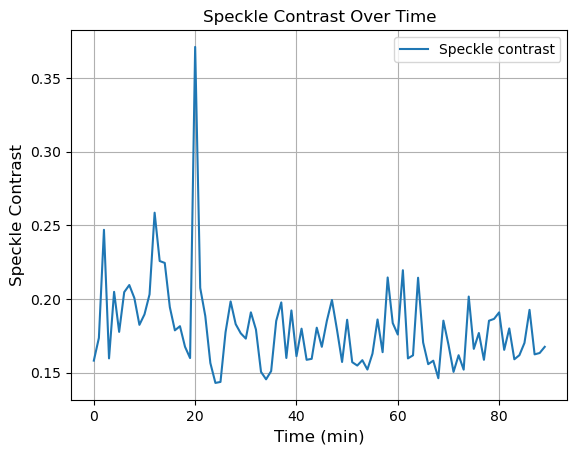

Plot saved as Speckle_contrast.png
Speckle contrast values saved in Speckle_contrast_values.csv


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the main directory containing the speckle images
image_dir = r'C:\Users\91897\Desktop\CP302\Speckle Images\C_3\Set2\Corner'

# Number of files
num_files = 90

# Initialize arrays to store the speckle contrast and mean intensity
speckle_contrast = np.zeros(num_files)
mean_intensity = np.zeros(num_files)

# Process each file one by one
for i in range(1, num_files + 1):
    # Construct the file name
    file_name = f'T{i}.ascii.csv'
    file_path = os.path.join(image_dir, file_name)
    
    # Check if the file exists before trying to read it
    if os.path.isfile(file_path):
        try:
            # Read the CSV file (handling missing/invalid data)
            data = pd.read_csv(file_path, header=None, delimiter=',', on_bad_lines='skip').fillna(0).to_numpy()
            
            # Select the region of interest (ROI)
            roi_data = data[400:1100, 600:1300]
            
            # Calculate standard deviation and mean intensity for the ROI
            std_dev = np.std(roi_data)
            mean_val = np.mean(roi_data)
            
            # Speckle contrast = standard deviation / mean intensity
            speckle_contrast[i - 1] = std_dev / mean_val if mean_val != 0 else 0
            mean_intensity[i - 1] = mean_val
            
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    else:
        print(f'File not found: {file_path}')

# Display speckle contrast values
print('Speckle contrast values:')
print(speckle_contrast)
print('Mean speckle contrast:')
print(np.mean(speckle_contrast))

# Define the time array for plotting
time = np.arange(0, num_files)

# Plot the speckle contrast vs time
plt.figure()
plt.plot(time, speckle_contrast, linewidth=1.5, label='Speckle contrast')
plt.xlabel('Time (min)', fontsize=12)
plt.ylabel('Speckle Contrast', fontsize=12)
plt.title('Speckle Contrast Over Time')
plt.grid(True)
plt.legend()

# Save the plot as a PNG image
plot_filename = 'Speckle_contrast.png'
plt.savefig(plot_filename)
plt.show()

# Save the speckle contrast values to a CSV file
csv_filename = 'Speckle_contrast_values.csv'
df = pd.DataFrame({'Time (min)': time, 'Speckle Contrast': speckle_contrast})
df.to_csv(csv_filename, index=False)

print(f'Plot saved as {plot_filename}')
print(f'Speckle contrast values saved in {csv_filename}')


Code for Set 1  speckle images

In [6]:
import cv2
import numpy as np
import os
import csv

# Define the main directory containing the speckle images
image_dir = r'C:\Users\91897\Desktop\CP302\Speckle Images\C_4\Set1\Corner'

# Number of files
num_files = 90

# Initialize arrays to store speckle contrast values
speckle_contrast = []

# Iterate through each file
for i in range(num_files):
    # Construct the file name
    file_name = f'T{i}_0008.png'
    file_path = os.path.join(image_dir, file_name)
    
    # Check if the file exists before trying to read it
    if os.path.isfile(file_path):
        # Read the image
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        
        # Define the region of interest (ROI)
        roi = image[400:1100, 600:1300]  # Adjust based on your image size and ROI
        
        # Calculate the mean and standard deviation of the ROI
        mean_intensity = np.mean(roi)
        std_deviation = np.sqrt(np.mean((roi - mean_intensity) ** 2))
        
        # Calculate speckle contrast
        contrast = std_deviation / mean_intensity
        speckle_contrast.append(contrast)
    else:
        print(f'File not found: {file_path}')

# Save the speckle contrast values to a CSV file
csv_file_path = os.path.join(image_dir, 'speckle_contrast_values.csv')
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Sample Number', 'Speckle Contrast'])
    for i, contrast in enumerate(speckle_contrast):
        writer.writerow([f'T{i}', contrast])

# Print the mean speckle contrast value
print(f'Mean Speckle Contrast: {np.mean(speckle_contrast)}')


Mean Speckle Contrast: 0.37585705607188186
